In [46]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import math
from IPython.display import clear_output

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [206]:
times=[]
with open('timelist.txt', 'r') as fp:
    for line in fp:
        times.append(line[:-1])

nodates=[]
with open('nodatelist.txt', 'r') as fp:
    for line in fp:
        nodates.append(line[:-1])

In [207]:
nodates

['2018/10/01',
 '2018/11/30',
 '2019/04/24',
 '2019/05/14',
 '2019/07/22',
 '2019/08/19',
 '2019/09/17',
 '2019/09/20',
 '2019/09/23',
 '2019/11/18',
 '2019/12/02',
 '2019/12/05',
 '2020/01/09',
 '2020/02/07',
 '2020/02/18',
 '2020/03/13',
 '2020/03/23',
 '2020/05/29',
 '2020/06/03',
 '2020/06/04',
 '2020/06/11',
 '2020/09/03',
 '2020/09/11',
 '2019/10/11',
 '2018/10/30',
 '2018/10/31',
 '2020/05/15',
 '2018/10/29',
 '2019/10/17',
 '2018/11/01',
 '2019/10/14',
 '2018/10/26',
 '2019/10/16',
 '2019/10/15']

In [195]:
bnifty = pd.read_csv('banknifty_master.csv',low_memory=False,header=None,on_bad_lines='skip',names=["Strike", "Date", "Time", "Open","High","Low","Close","Volume"])
bnifty = bnifty[bnifty['Time'].isin(times)]
bnifty = bnifty[~bnifty['Date'].isin(nodates)]
bnifty.reset_index(inplace=True)
bnifty.drop('index',axis=1,inplace=True)

In [196]:
bnifty

,Strike,Date,Time,Open,High,Low,Close,Volume
0,25300CE,2018/05/02,09:20,311.55,325.90,311.55,322.30,480
1,25300PE,2018/05/02,09:20,15.15,15.20,13.60,15.00,53000
2,25400CE,2018/05/02,09:20,228.00,241.00,228.00,230.00,5440
3,25400PE,2018/05/02,09:20,27.00,27.00,23.70,26.65,52320
4,25500CE,2018/05/02,09:20,153.20,163.80,153.20,156.00,27320
...,...,...,...,...,...,...,...,...
754130,22500PE,2020/09/17,15:25,176.60,178.45,176.05,177.75,37425
754131,22600CE,2020/09/17,15:25,0.20,0.35,0.15,0.15,337850
754132,22600PE,2020/09/17,15:25,275.95,278.75,275.90,277.75,25050
754133,22700CE,2020/09/17,15:25,0.10,0.25,0.10,0.15,174900


In [197]:
bniftyu = pd.read_csv('BNF_2010_2020.csv',low_memory=False,on_bad_lines='skip')
bniftyu = bniftyu[(bniftyu.Date >= 20180502) & (bniftyu.Date <=20200917)]
bniftyu = bniftyu[bniftyu['Time'].isin(times)]
bniftyu['Date'] = bniftyu['Date'].astype(str)
bniftyu['Date'] =bniftyu['Date'].apply(lambda x:x[:4]+'/'+x[4:6]+'/'+x[6:])
# missingdates = list(set(bniftyu['Date']) - set(bnifty['Date']))
# missingdates=missingdates+['2019/04/24','2020/02/18','2020/03/13','2020/03/23']
bniftyu = bniftyu[~bniftyu['Date'].isin(nodates)]
bniftyu.reset_index(inplace=True)
bniftyu.drop('index',axis=1,inplace=True)

In [199]:
bnifty[(bnifty['Date']=='2018/05/02') & (bnifty['Time']=='09:20')]

,Strike,Date,Time,Open,High,Low,Close,Volume
0,25300CE,2018/05/02,09:20,311.55,325.9,311.55,322.30,480
1,25300PE,2018/05/02,09:20,15.15,15.2,13.60,15.00,53000
2,25400CE,2018/05/02,09:20,228.00,241.0,228.00,230.00,5440
3,25400PE,2018/05/02,09:20,27.00,27.0,23.70,26.65,52320
4,25500CE,2018/05/02,09:20,153.20,163.8,153.20,156.00,27320
5,25500PE,2018/05/02,09:20,49.50,49.5,43.95,48.30,80440
6,25600CE,2018/05/02,09:20,94.35,102.3,94.35,96.00,46360
7,25600PE,2018/05/02,09:20,85.90,86.2,77.45,84.75,50160
8,25700CE,2018/05/02,09:20,53.00,58.7,53.00,53.35,69640
9,25700PE,2018/05/02,09:20,139.10,139.1,128.05,136.65,25480


In [200]:
bniftyu

,Instrument,Date,Time,Open,High,Low,Close
0,BANKNIFTY,2018/05/02,09:20,25610.90,25628.40,25606.8,25612.00
1,BANKNIFTY,2018/05/02,09:25,25586.60,25598.10,25573.3,25595.40
2,BANKNIFTY,2018/05/02,09:30,25618.80,25629.00,25608.8,25627.60
3,BANKNIFTY,2018/05/02,09:35,25621.30,25624.80,25614.7,25619.80
4,BANKNIFTY,2018/05/02,09:40,25625.20,25625.20,25605.9,25605.90
...,...,...,...,...,...,...,...
40991,BANKNIFTY,2020/09/17,15:05,22328.30,22330.35,22314.7,22314.70
40992,BANKNIFTY,2020/09/17,15:10,22325.95,22336.00,22323.1,22331.00
40993,BANKNIFTY,2020/09/17,15:15,22327.70,22333.85,22320.8,22328.65
40994,BANKNIFTY,2020/09/17,15:20,22330.60,22337.40,22327.5,22333.90


In [201]:
bnifty

,Strike,Date,Time,Open,High,Low,Close,Volume
0,25300CE,2018/05/02,09:20,311.55,325.90,311.55,322.30,480
1,25300PE,2018/05/02,09:20,15.15,15.20,13.60,15.00,53000
2,25400CE,2018/05/02,09:20,228.00,241.00,228.00,230.00,5440
3,25400PE,2018/05/02,09:20,27.00,27.00,23.70,26.65,52320
4,25500CE,2018/05/02,09:20,153.20,163.80,153.20,156.00,27320
...,...,...,...,...,...,...,...,...
754130,22500PE,2020/09/17,15:25,176.60,178.45,176.05,177.75,37425
754131,22600CE,2020/09/17,15:25,0.20,0.35,0.15,0.15,337850
754132,22600PE,2020/09/17,15:25,275.95,278.75,275.90,277.75,25050
754133,22700CE,2020/09/17,15:25,0.10,0.25,0.10,0.15,174900


In [202]:
csbnifty = pd.DataFrame(columns=['Strike','Date','Time','Open','High','Low','Close'])
psbnifty = pd.DataFrame(columns=['Strike','Date','Time','Open','High','Low','Close'])
psbnifty=bnifty.groupby(['Date','Time']).nth([3])
csbnifty=bnifty.groupby(['Date','Time']).nth([4])
psbnifty.reset_index(inplace=True)
csbnifty.reset_index(inplace=True)

In [203]:
csbnifty

,Date,Time,Strike,Open,High,Low,Close,Volume
0,2018/05/02,09:20,25500CE,153.20,163.80,153.20,156.00,27320
1,2018/05/02,09:25,25500CE,139.20,144.50,137.40,144.00,13280
2,2018/05/02,09:30,25500CE,150.50,156.50,147.50,155.60,20880
3,2018/05/02,09:35,25500CE,158.20,158.20,154.15,157.50,7640
4,2018/05/02,09:40,25500CE,154.05,155.05,147.00,148.55,12240
...,...,...,...,...,...,...,...,...
40991,2020/09/17,15:05,22300CE,34.75,41.45,31.65,31.80,531925
40992,2020/09/17,15:10,22300CE,33.60,34.10,17.00,18.40,615575
40993,2020/09/17,15:15,22300CE,29.45,34.10,29.00,33.50,632975
40994,2020/09/17,15:20,22300CE,29.45,30.40,25.00,26.80,373325


In [261]:
plotbnifty=bniftyu.copy()

In [262]:
plotbnifty.drop('Instrument',axis=1,inplace=True)

In [263]:
plotbnifty

,Date,Time,Open,High,Low,Close
0,2018/05/02,09:20,25610.90,25628.40,25606.8,25612.00
1,2018/05/02,09:25,25586.60,25598.10,25573.3,25595.40
2,2018/05/02,09:30,25618.80,25629.00,25608.8,25627.60
3,2018/05/02,09:35,25621.30,25624.80,25614.7,25619.80
4,2018/05/02,09:40,25625.20,25625.20,25605.9,25605.90
...,...,...,...,...,...,...
40991,2020/09/17,15:05,22328.30,22330.35,22314.7,22314.70
40992,2020/09/17,15:10,22325.95,22336.00,22323.1,22331.00
40993,2020/09/17,15:15,22327.70,22333.85,22320.8,22328.65
40994,2020/09/17,15:20,22330.60,22337.40,22327.5,22333.90


In [264]:
plotbnifty['Date'] = pd.to_datetime(plotbnifty.Date+' '+plotbnifty.Time)
plotbnifty['Date'] = plotbnifty['Date'].apply(mpl_dates.date2num)
plotbnifty.drop('Time',axis=1,inplace=True)

In [265]:
plotbnifty

,Date,Open,High,Low,Close
0,17653.388889,25610.90,25628.40,25606.8,25612.00
1,17653.392361,25586.60,25598.10,25573.3,25595.40
2,17653.395833,25618.80,25629.00,25608.8,25627.60
3,17653.399306,25621.30,25624.80,25614.7,25619.80
4,17653.402778,25625.20,25625.20,25605.9,25605.90
...,...,...,...,...,...
40991,18522.628472,22328.30,22330.35,22314.7,22314.70
40992,18522.631944,22325.95,22336.00,22323.1,22331.00
40993,18522.635417,22327.70,22333.85,22320.8,22328.65
40994,18522.638889,22330.60,22337.40,22327.5,22333.90


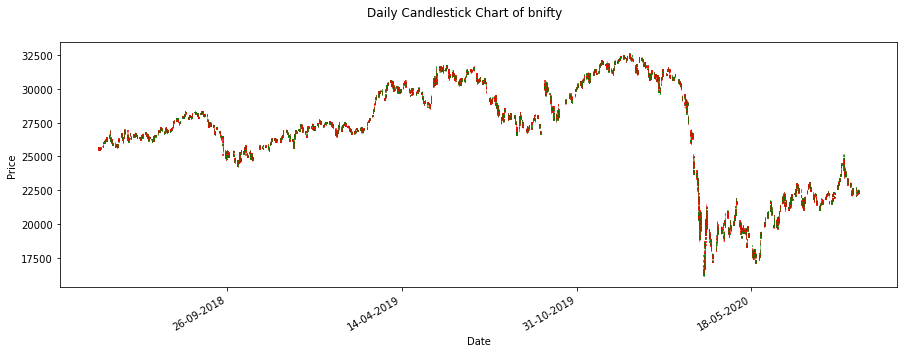

In [267]:
# Creating Subplots
fig, ax = plt.subplots(figsize=(15,5))

candlestick_ohlc(ax, plotbnifty.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
# plt.plot(bnifty[a:]['Date'], bnifty[a:]['bala'])
# plt.plot(bnifty[a:]['Date'], bal,'k')
# plt.plot(bnifty[a:]['Date'], bnifty[a:]['sma'])
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of bnifty')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

#fig.tight_layout()len(bal)

In [199]:
# sbnifty.drop('intTime',axis=1,inplace=True)

In [14]:
# # Creating Subplots
# fig, ax = plt.subplots(figsize=(15,10))

# candlestick_ohlc(ax, sbnifty[:100].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
# #plt.plot(bnifty[:100]['Date'],(bnifty['Close'][::-1].rolling(20).mean())[-100:][::-1])
# # Setting labels & titles
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# fig.suptitle('Daily Candlestick Chart of bnifty50')

# # Formatting Date
# #fig.tight_layout()

In [201]:
# bnifty.reset_index(inplace=True)
# bnifty.drop('index',axis=1,inplace=True)

In [526]:
bnifty['Date'] = bnifty['Date'].apply(mpl_dates.num2date)

In [528]:
flag=0
profit=0
loss=0
startyear=2020
a=bnifty.loc[bnifty['Date'].apply(lambda x:str(x).startswith(str(startyear)))].index[0]
ini=100000
balance=ini
minbalance=ini
maxbalance=0
bal=[]
for i in range(len(bnifty['Close'][a:])):
    bal.append(balance)
    n=int(balance/bnifty['Close'][i+a])
    if flag==0 and bnifty['Close'][i+a]>=bnifty['Close'].rolling(20).mean()[i+a]:
        buy=bnifty['Close'][i+a]
        #print("buy on ",str(bnifty['Date'][i+a])[:11])
        flag=1
    if flag==1 and bnifty['Close'][i+a]<bnifty['Close'].rolling(20).mean()[i+a]:
        sell=bnifty['Close'][i+a]
        #print("sell on ",str(bnifty['Date'][i+a])[:11])
        flag=2
    if flag==2:
        if sell>=buy:
            balance=balance+n*5*(sell-buy)
            #print("Profit of ₹{:.2f} with {:.2f}% on {} for bnifty50 price {}".format(n*(sell-buy),500*(sell-buy)/buy,str(bnifty['Date'][i+a])[:11],bnifty['Close'][i+a]))
        else:
            balance=balance-n*5*(buy-sell)
            #print("Loss of ₹{:.2f} with {:.3f}% on {} for bnifty50 price {}".format(n*(buy-sell),500*(buy-sell)/buy,str(bnifty['Date'][i+a])[:11],bnifty['Close'][i+a]))
        flag=0
        if balance>=maxbalance:
            maxbalance=balance
        else:
            minbalance=balance
    if balance<0:
        print("Total Loss")
        break

res=(balance-ini)/ini
if balance>=ini:
    print("Final Balance is ₹{:.2f} with return of {:.2f}% with cagr of {:.2f}%".format(balance,res*100,(10**(math.log((1+res),10)/(2022-startyear))-1)*100))
else:
    print("Final Balance is ₹{:.2f} with a loss of {:.2f} at {:.2f}%".format(balance,ini-balance,100*(ini-balance)/ini))

ren=(bnifty['Close'][i+a]-bnifty['Close'][a])/bnifty['Close'][a]
print("bnifty Return for the while is {:.2f}% with cagr of {:.2f}%".format(100*ren,(10**(math.log((1+ren),10)/(2022-startyear))-1)*100))
print("Minimum Balance was ₹{:.2f} and Maximum Balance was ₹{:.2f}".format(minbalance,maxbalance))

Final Balance is ₹201978.50 with return of 101.98% with cagr of 42.12%
Nifty Return for the while is 31.06% with cagr of 14.48%
Minimum Balance was ₹201978.50 and Maximum Balance was ₹237052.25


In [529]:
bnifty['bala']=bnifty['Close']*(ini/bnifty['Close'][a])

In [530]:
bnifty['Date']=pd.to_datetime(bnifty['Date'])
bnifty['Date'] = bnifty['Date'].apply(mpl_dates.date2num)

In [533]:
bnifty

,Date,Open,High,Low,Close,bala,sma
0,9437.0,994.20,1000.91,992.69,1000.00,8208.495793,NaN
1,9440.0,1001.53,1001.53,988.92,988.92,8117.545660,NaN
2,9441.0,987.17,987.17,977.05,978.22,8029.714755,NaN
3,9442.0,976.28,976.28,962.98,964.01,7913.072030,NaN
4,9443.0,960.32,960.32,952.13,953.07,7823.271086,NaN
...,...,...,...,...,...,...,...
6638,19180.0,16113.75,16150.50,16045.95,16132.90,132426.841781,129863.020317
6639,19181.0,16273.65,16275.50,16157.90,16220.60,133146.726862,129870.783311
6640,19184.0,16136.15,16248.55,16115.50,16216.00,133108.967782,130053.131088
6641,19185.0,16126.20,16158.75,16031.15,16058.30,131814.487995,130187.827295


In [532]:
bnifty['sma']=bnifty['Close'].rolling(20).mean()
bnifty['sma']=bnifty['sma']*(ini/bnifty['sma'][a])

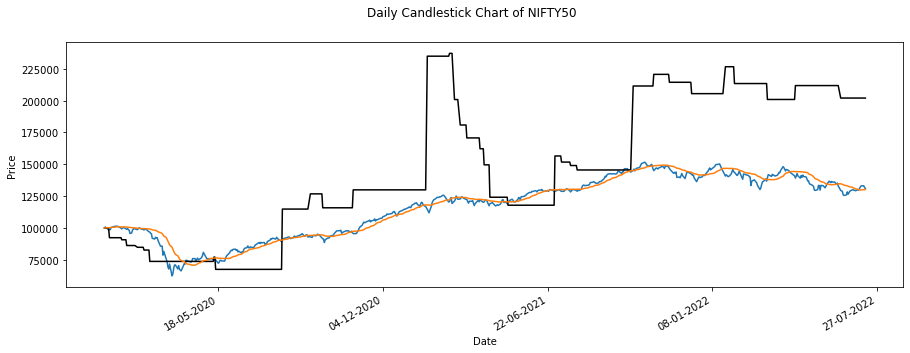

In [534]:
# Creating Subplots
fig, ax = plt.subplots(figsize=(15,5))

#candlestick_ohlc(ax, nifty[a:].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
plt.plot(nifty[a:]['Date'], nifty[a:]['bala'])
plt.plot(nifty[a:]['Date'], bal,'k')
plt.plot(nifty[a:]['Date'], nifty[a:]['sma'])
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

# fig.tight_layout()